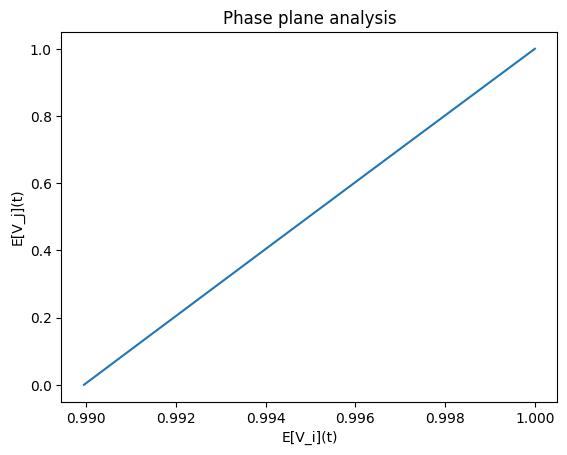

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the time points
t = np.linspace(0, 100, 1000)

# Define the initial conditions
E_Vi_0 = 1
E_Vj_0 = 1

# Define the parameters
beta = 0.001
gamma = 0.1

# Define the system of equations
def dE_Vi_dt(E_Vi, E_Vj):
    return -beta * E_Vi * E_Vj

def dE_Vj_dt(E_Vi, E_Vj):
    return beta * E_Vi * E_Vj - gamma * E_Vj

# Solve the system of equations
from scipy.integrate import odeint
def equations(state, t):
    E_Vi, E_Vj = state
    return [dE_Vi_dt(E_Vi, E_Vj), dE_Vj_dt(E_Vi, E_Vj)]
state0 = [E_Vi_0, E_Vj_0]
states = odeint(equations, state0, t)

# Plot the trajectories
plt.figure()
plt.plot(states[:, 0], states[:, 1])
plt.xlabel('E[V_i](t)')
plt.ylabel('E[V_j](t)')
plt.title('Phase plane analysis')
plt.show()

IndexError: index 100 is out of bounds for axis 0 with size 100

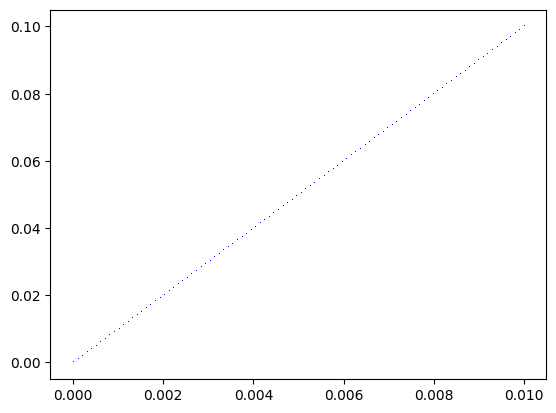

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define the time points
t = np.linspace(0, 100, 1000)

# Define the initial conditions
E_Vi_0 = 1
E_Vj_0 = 1

# Define the parameters
beta_values = np.linspace(0, 0.01, 100)
gamma_values = np.linspace(0, 0.1, 100)

# Define the system of equations
def dE_Vi_dt(E_Vi, E_Vj, beta, gamma):
    return -beta * E_Vi * E_Vj

def dE_Vj_dt(E_Vi, E_Vj, beta, gamma):
    return beta * E_Vi * E_Vj - gamma * E_Vj

# Solve the system of equations for different parameter values
from scipy.integrate import odeint
def equations(state, t, beta, gamma):
    E_Vi, E_Vj = state
    return [dE_Vi_dt(E_Vi, E_Vj, beta, gamma), dE_Vj_dt(E_Vi, E_Vj, beta, gamma)]
states = []
for beta in beta_values:
    for gamma in gamma_values:
        state0 = [E_Vi_0, E_Vj_0]
        states.append(odeint(equations, state0, t, args=(beta, gamma)))

# Plot the bifurcation diagram
plt.figure()
for i, state in enumerate(states):
    plt.plot(beta_values[i], gamma_values[i], 'b,')
plt.xlabel('Transmission rate (beta)')
plt.ylabel('Recovery rate (gamma)')
plt.title('Bifurcation analysis')
plt.show()

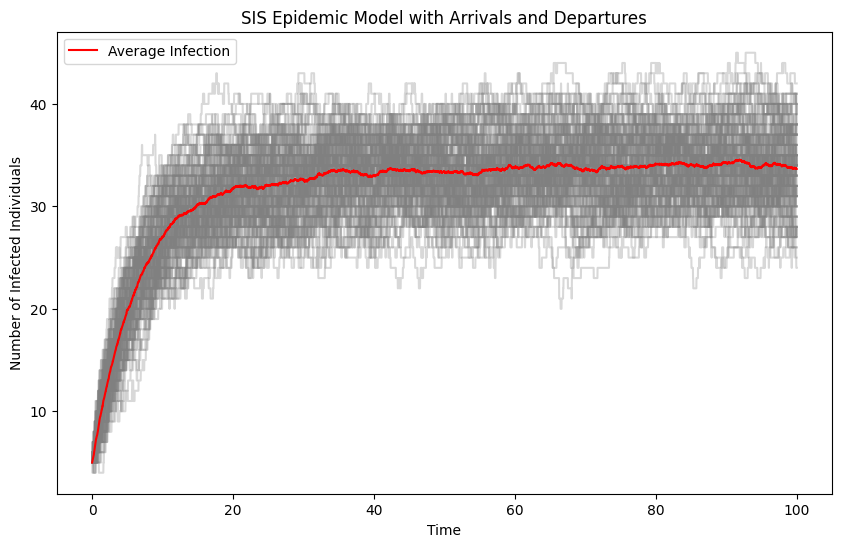

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
beta = 0.1  # Infection rate
delta = 0.05  # Recovery rate
mu_a = 0.02  # Arrival rate
mu_d = 0.01  # Departure rate
T = 100  # Total time
dt = 0.01  # Time step
N_simulations = 100  # Number of simulations

def simulate_sis(T, dt, beta, delta, mu_a, mu_d):
    # Initialize time and state variables
    t = np.arange(0, T + dt, dt)
    N = len(t)
    V = np.zeros(N)  # Infected individuals
    V[0] = 5  # Initial number of infected individuals
    total_population = 50  # Initial total population

    # Simulate the dynamics
    for i in range(1, N):
        recovery_events = np.random.binomial(V[i-1], delta*dt)
        if total_population - V[i-1] > 0:
            infection_events = np.random.binomial(total_population - V[i-1], beta*dt)
        else:
            infection_events = 0
        arrival_events = np.random.poisson(mu_a*dt)
        departure_events = np.random.poisson(mu_d*dt)
        
        # Update the state
        V[i] = np.maximum(0, V[i-1] + infection_events - recovery_events)
        # Handle population changes
        total_population = np.maximum(1, total_population + arrival_events - departure_events)
        V[i] = min(V[i], total_population)  # Infected cannot exceed the total population
        
    return t, V

# Simulation
results = []
for i in range(N_simulations):
    _, V = simulate_sis(T, dt, beta, delta, mu_a, mu_d)
    results.append(V)

# Compute the average across all simulations
average_infection = np.mean(results, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
for V in results:
    plt.plot(_, V, color='gray', alpha=0.3)  # Individual realizations
plt.plot(_, average_infection, color='red', label='Average Infection')  # Average
plt.xlabel('Time')
plt.ylabel('Number of Infected Individuals')
plt.legend()
plt.title('SIS Epidemic Model with Arrivals and Departures')
plt.show()


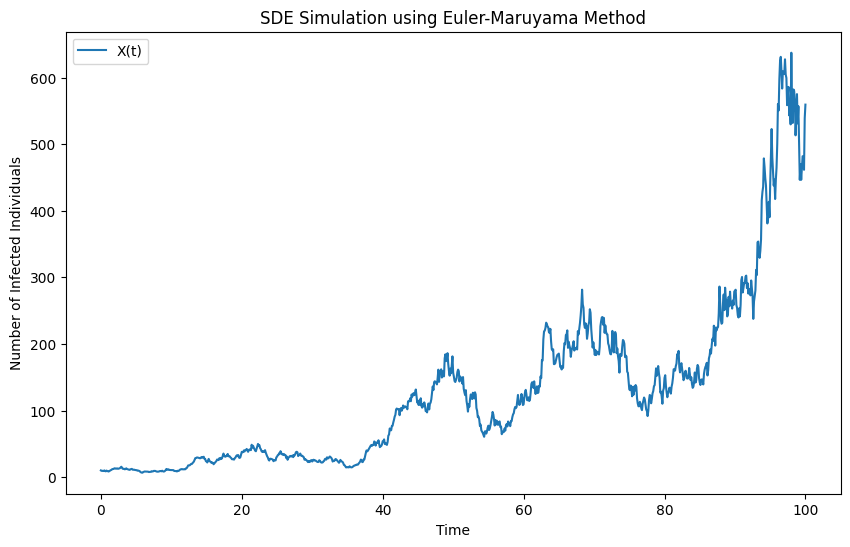

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 0.1  # Drift coefficient
b = 0.2  # Diffusion coefficient
X0 = 10  # Initial condition
T = 100  # Total time
dt = 0.1  # Time step

# Time array
t = np.arange(0, T + dt, dt)
N = len(t)

# Wiener increments
dW = np.random.normal(0, np.sqrt(dt), N-1)
# Prepend 0 to align with time array size (initial dW is 0 since there's no change at start)
dW = np.insert(dW, 0, 0)

# Initialize the process array
X = np.zeros(N)
X[0] = X0

# Euler-Maruyama Method
for i in range(1, N):
    X[i] = X[i-1] + a*X[i-1]*dt + b*X[i-1]*dW[i]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, X, label='X(t)')
plt.title('SDE Simulation using Euler-Maruyama Method')
plt.xlabel('Time')
plt.ylabel('Number of Infected Individuals')
plt.legend()
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions f, g_a, and g_d
def f(V):
	S, I = V
	beta = 0.001  # infection rate
	gamma = 0.05  # recovery rate
	dS_dt = -beta * S * I
	dI_dt = beta * S * I - gamma * I
	return [dS_dt, dI_dt]
def g_a(V):
	S, I = V
	arrival_rate = 0.1  # arrival rate of new susceptible individuals
	return [arrival_rate, 0]
def g_d(V):
	S, I = V
	departure_rate = 0.05  # departure rate of infected individuals
	return [0, -departure_rate * I]

# Simulate the original SDE
N = 1000  # population size
T = 10  # time horizon
dt = 0.01  # time step
V0 = ...  # initial condition [S(0), I(0)] = [999, 1]

V = np.zeros((N, T))
V[:, 0] = V0

for i in range(1, T):
	V[:, i] = V[:, i-1] + f(V[:, i-1]) * dt + g_a(V[:, i-1]) * np.random.normal(0, np.sqrt(dt)) + g_d(V[:, i-1]) * np.random.normal(0, np.sqrt(dt))

# Calculate the mean-field approximation
mf_V = np.mean(V, axis=0)

# Simulate the mean-field approximation
mf_V_sim = np.zeros((T,))
mf_V_sim[0] = mf_V[0]

for i in range(1, T):
	mf_V_sim[i] = mf_V_sim[i-1] + f(mf_V_sim[i-1]) * dt + g_a(mf_V_sim[i-1]) * np.random.normal(0, np.sqrt(dt)) + g_d(mf_V_sim[i-1]) * np.random.normal(0, np.sqrt(dt))

# Plot the results
plt.plot(V[:, -1], label='Original SDE')
plt.plot(mf_V_sim, label='Mean-Field Approximation')
plt.legend()
plt.show()

TypeError: float() argument must be a string or a real number, not 'ellipsis'

Average number of infections: 29.448803242848836


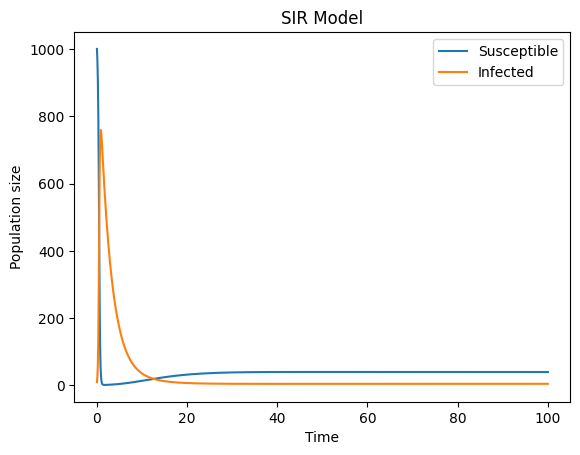

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# define the parameters
Lambda = 10
beta = 0.01
mu_S = 0.2
mu_I = 0.3
r = 0.1
D_S = 0.1
D_I = 0.1
T = 100  # time horizon

# define the model
def model(populations, t):
	S, I = populations
	dSdt = Lambda - beta * S * I - mu_S * S
	dIdt = beta * S * I - (r + mu_I) * I
	return [dSdt, dIdt]

# initial conditions
S0 = 1000
I0 = 10
populations0 = [S0, I0]

# time points
t = np.linspace(0, T, 1000)

# solve ODE
populations = odeint(model, populations0, t)

# compute average number of infections
I_avg = np.mean(populations[:, 1])

print("Average number of infections:", I_avg)

# plot results
plt.plot(t, populations[:, 0], label='Susceptible')
plt.plot(t, populations[:, 1], label='Infected')
plt.xlabel('Time')
plt.ylabel('Population size')
plt.title('SIR Model')
plt.legend()
plt.show()

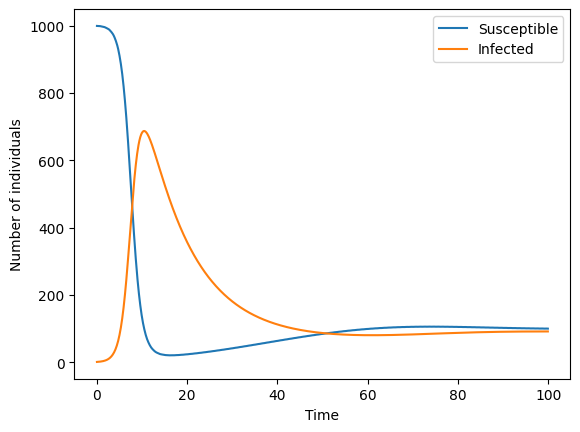

ValueError: too many values to unpack (expected 2)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
beta = 0.001
gamma = 0.1
delta = 0.01
lambda_ = 10

# Define the initial conditions
S0 = 999
I0 = 1

# Define the time points
t = np.arange(0, 100, 0.1)

# Define the ODEs with varying rates of arrivals and departures
def dS_dt(S, I, t):
    arrival_rate = lambda_ * (1 + 0.1 * np.sin(2 * np.pi * t))
    departure_rate = delta * (1 + 0.1 * np.cos(2 * np.pi * t))
    return -beta * S * I - departure_rate * S + arrival_rate

def dI_dt(S, I, t):
    return beta * S * I - gamma * I

# Solve the ODEs
from scipy.integrate import odeint
def SIS_model(initial_conditions, t):
    S, I = initial_conditions
    dS_dt_ = dS_dt(S, I, t)
    dI_dt_ = dI_dt(S, I, t)
    return [dS_dt_, dI_dt_]

initial_conditions = [S0, I0]
solution = odeint(SIS_model, initial_conditions, t)

# Plot the results
plt.plot(t, solution[:, 0], label='Susceptible')
plt.plot(t, solution[:, 1], label='Infected')
plt.xlabel('Time')
plt.ylabel('Number of individuals')
plt.legend()
plt.show()

# Define the open network parameters
N = 1000
k = 10
p = 0.1

# Define the network structure
network = np.random.rand(N, N)
network[network < p] = 0
network[network >= p] = 1

# Define the initial conditions for the network
S0_network = np.zeros(N)
S0_network[0] = S0
I0_network = np.zeros(N)
I0_network[0] = I0

# Solve the ODEs for the network
def SIS_network(initial_conditions, t):
    S, I = initial_conditions
    dS_dt_ = np.zeros(N)
    dI_dt_ = np.zeros(N)
    for i in range(N):
        for j in range(N):
            if network[i, j] == 1:
                dS_dt_[i] += -beta * S[i] * I[j] - delta * S[i] + lambda_
                dI_dt_[i] += beta * S[i] * I[j] - gamma * I[i]
    return [dS_dt_, dI_dt_]

initial_conditions_network = [S0_network, I0_network]
initial_conditions_network = np.array(initial_conditions_network).flatten()
solution_network = odeint(SIS_network, initial_conditions_network, t)

# Plot the results for the network
plt.plot(t, solution_network[:, 0], label='Susceptible')
plt.plot(t, solution_network[:, 1], label='Infected')
plt.xlabel('Time')
plt.ylabel('Number of individuals')
plt.legend()
plt.show()